# SVM

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('bank-additional.csv', sep=';')

# Split into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Extract features and target variable
X_train = train_data.drop('y', axis=1)
y_train = train_data['y']

X_test = test_data.drop('y', axis=1)
y_test = test_data['y']

# Convert categorical target variable to numerical
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Define categorical and numeric features
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create a transformer for data preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Add PCA to the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),  # Adjust the explained variance threshold as needed
    ('classifier', SVC())  # Using Support Vector Classifier with default settings
])

# Parameter selection using GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  # Regularization parameter
    'classifier__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters found by the grid search
best_params = grid_search.best_params_

# Cross-validation predictions
cv_predictions = grid_search.predict(X_train)

# Classification error
classification_error = 1 - accuracy_score(y_train, cv_predictions)

# Confusion matrix
conf_matrix = confusion_matrix(y_train, cv_predictions)

# Classification report
classification_rep = classification_report(y_train, cv_predictions)

# Output results
print("Best Parameters:", best_params)
print("Classification Error: {:.2f}%".format(classification_error * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Best Parameters: {'classifier__C': 10, 'classifier__kernel': 'linear'}
Classification Error: 8.59%
Confusion Matrix:
 [[2865   71]
 [ 212  147]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      2936
           1       0.67      0.41      0.51       359

    accuracy                           0.91      3295
   macro avg       0.80      0.69      0.73      3295
weighted avg       0.90      0.91      0.90      3295



# MLR(Multilinear Regression)

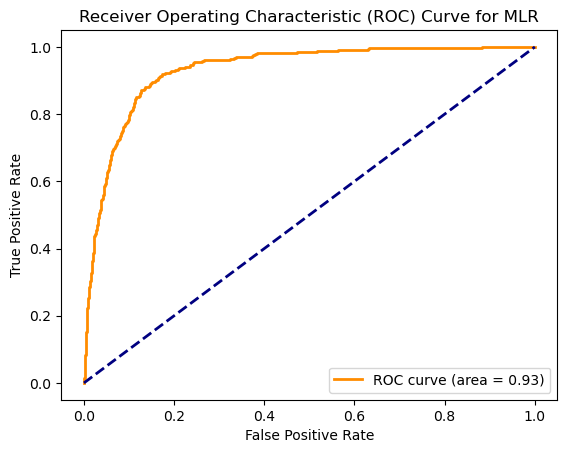

Cross-validation Best Parameters for MLR: {'classifier__C': 1}
Classification Error for MLR: 8.44%
Confusion Matrix for MLR:
 [[2858   78]
 [ 200  159]]
Classification Report for MLR:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      2936
           1       0.67      0.44      0.53       359

    accuracy                           0.92      3295
   macro avg       0.80      0.71      0.74      3295
weighted avg       0.91      0.92      0.91      3295



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('bank-additional.csv', sep=';')

# Split into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Extract features and target variable
X_train = train_data.drop('y', axis=1)
y_train = train_data['y']

X_test = test_data.drop('y', axis=1)
y_test = test_data['y']

# Convert categorical target variable to numerical with 0 and 1
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Define categorical and numeric features
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create a transformer for data preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# MLR Pipeline with increased max_iter
pipeline_mlr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42))
])

# Parameter selection using GridSearchCV for MLR
param_grid_mlr = {
    'classifier__C': [0.1, 1, 10, 100],  # Regularization parameter
}

grid_search_mlr = GridSearchCV(pipeline_mlr, param_grid_mlr, cv=5)
grid_search_mlr.fit(X_train, y_train)

# Best parameters found by the grid search for MLR
best_params_mlr = grid_search_mlr.best_params_

# Cross-validation predictions for MLR
cv_predictions_mlr = cross_val_predict(grid_search_mlr, X_train, y_train, cv=5)

# Classification error for MLR
classification_error_mlr = 1 - accuracy_score(y_train, cv_predictions_mlr)

# Confusion matrix for MLR
conf_matrix_mlr = confusion_matrix(y_train, cv_predictions_mlr)

# Classification report for MLR
classification_rep_mlr = classification_report(y_train, cv_predictions_mlr)

# Compute ROC curve and AUC for MLR
y_scores_mlr = cross_val_predict(grid_search_mlr, X_train, y_train, cv=5, method="predict_proba")
fpr_mlr, tpr_mlr, _ = roc_curve(y_train, y_scores_mlr[:, 1])
roc_auc_mlr = auc(fpr_mlr, tpr_mlr)

# Visualize ROC Curve for MLR
plt.figure()
plt.plot(fpr_mlr, tpr_mlr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_mlr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for MLR')
plt.legend(loc='lower right')
plt.show()

# Output results for MLR
print("Cross-validation Best Parameters for MLR:", best_params_mlr)
print("Classification Error for MLR: {:.2f}%".format(classification_error_mlr * 100))
print("Confusion Matrix for MLR:\n", conf_matrix_mlr)
print("Classification Report for MLR:\n", classification_rep_mlr)


# BP (Back-Propagation)

Accuracy on the test set (BP): 89.68%
Cross-validation Best Parameters for MLR: {'classifier__C': 1}
BP Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.94       732
           1       0.63      0.18      0.29        92

    accuracy                           0.90       824
   macro avg       0.77      0.59      0.62       824
weighted avg       0.88      0.90      0.87       824



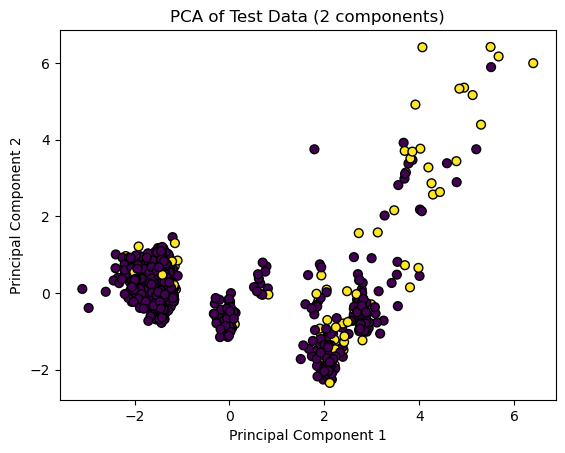

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('bank-additional.csv', sep=';')

# Split into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Extract features and target variable
X_train = train_data.drop('y', axis=1)
y_train = train_data['y']

X_test = test_data.drop('y', axis=1)
y_test = test_data['y']

# Convert categorical target variable to numerical with 0 and 1
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Define categorical and numeric features
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create a transformer for data preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Combine transformation and model in a pipeline
pipeline_bp = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2)),  # Set the number of components as needed
    ('classifier', MLPClassifier(max_iter=500, random_state=42))
])

# Fit the BP model
pipeline_bp.fit(X_train, y_train)

# Prediction on the test set
y_pred_bp = pipeline_bp.predict(X_test)

# Evaluation of the results
accuracy_bp = accuracy_score(y_test, y_pred_bp)
classification_rep_bp = classification_report(y_test, y_pred_bp)

# Output results
print("Accuracy on the test set (BP): {:.2f}%".format(accuracy_bp * 100))
print("Cross-validation Best Parameters for MLR:", best_params_mlr)
print("BP Classification Report:\n", classification_rep_bp)

# Visualization using PCA
X_test_pca = pipeline_bp.named_steps['pca'].transform(pipeline_bp.named_steps['preprocessor'].transform(X_test))

plt.figure()
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA of Test Data (2 components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
